In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # 显示所有列
from tqdm.notebook import tqdm
import geopandas as gpd
import transbigdata as tbd
# import geoplot as gplt

In [3]:
chengdu_distric = gpd.read_file('E:/Data/成都数据/chengdu_shp/chengdu_distric.shp')

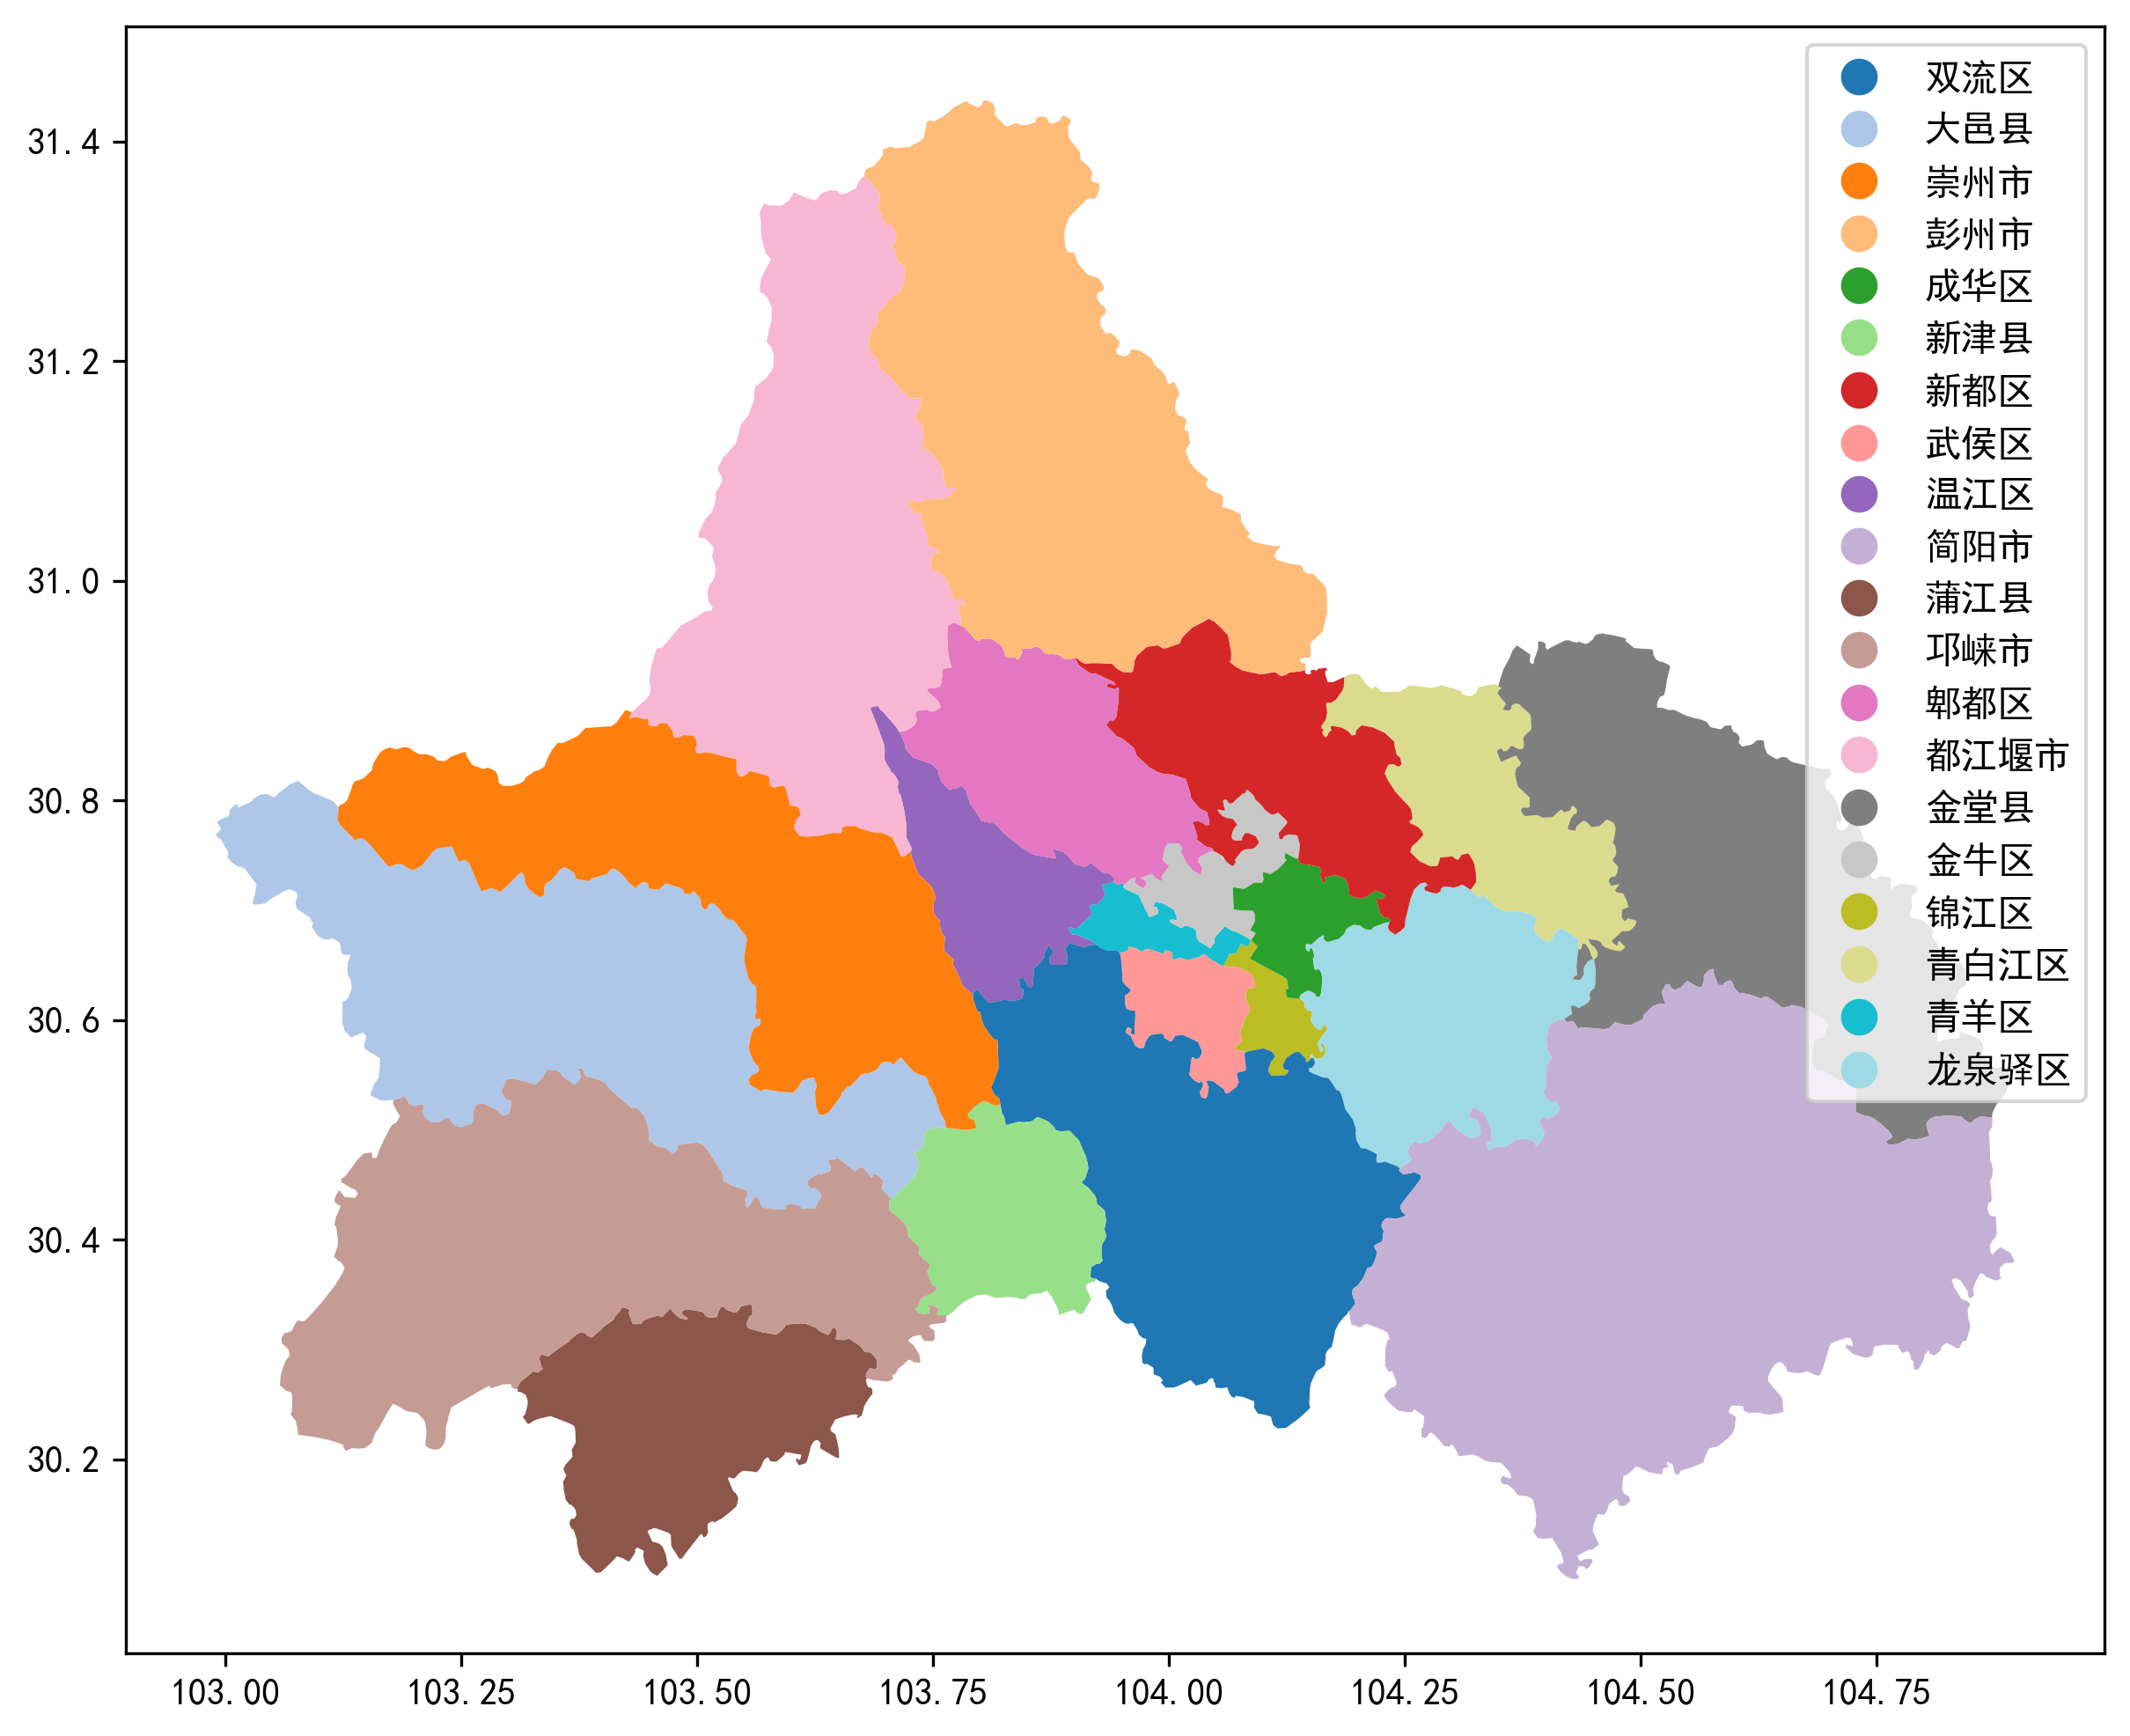

In [7]:
chengdu_distric.plot(column='NAME', figsize=(12, 8), cmap='tab20', legend=True)
plt.show()

In [15]:
chengdu_grid,_ = tbd.area_to_grid(location=chengdu_distric, accuracy=1000, method='hexa')

In [35]:
try:
    chengdu_grid.drop(['loncol_1','loncol_2','loncol_3'],axis=1,inplace=True)
    chengdu_grid['grid_id'] = range(chengdu_grid.shape[0])
    chengdu_grid['centr_lon'] = chengdu_grid['geometry'].centroid.x
    chengdu_grid['centr_lat'] = chengdu_grid['geometry'].centroid.y
except:
    print('不存在此列')

In [36]:
chengdu_grid

,geometry,grid_id,centr_lon,centr_lat
115,"POLYGON ((103.37686 30.10656, 103.38733 30.111...",0,103.387331,30.101363
121,"POLYGON ((103.39780 30.10656, 103.40826 30.111...",1,103.408263,30.101363
127,"POLYGON ((103.41873 30.10656, 103.42920 30.111...",2,103.429195,30.101363
133,"POLYGON ((103.43966 30.10656, 103.45013 30.111...",3,103.450127,30.101363
139,"POLYGON ((103.46059 30.10656, 103.47106 30.111...",4,103.471059,30.101363
...,...,...,...,...
243007,"POLYGON ((103.80597 31.43058, 103.81644 31.435...",4375,103.816438,31.425383
243013,"POLYGON ((103.82690 31.43058, 103.83737 31.435...",4376,103.837370,31.425383
243019,"POLYGON ((103.84784 31.43058, 103.85830 31.435...",4377,103.858302,31.425382
243025,"POLYGON ((103.86877 31.43058, 103.87923 31.435...",4378,103.879234,31.425382


In [46]:
trip2 = pd.read_csv('../trip_data_3_7.csv')

In [47]:
trip2

,bikeid,starttime,startlng,startlat,endtime,endlng,endlat,distance
0,8640251273,2018-03-07 16:03:31,104.054793,30.588302,2018-03-07 16:12:36,104.050409,30.595076,1.635
1,8640251273,2018-03-07 16:53:31,104.050273,30.595280,2018-03-07 17:03:02,104.034055,30.586827,1.713
2,286579859,2018-03-07 08:15:55,104.049847,30.595348,2018-03-07 08:24:14,104.063372,30.594266,1.497
3,8640013152,2018-03-07 20:03:01,104.049942,30.595406,2018-03-07 20:11:07,104.064141,30.590873,1.458
4,8642502342,2018-03-07 17:16:09,104.034672,30.586461,2018-03-07 17:29:47,104.050395,30.595085,2.454
...,...,...,...,...,...,...,...,...
700550,286595779,2018-03-07 16:36:25,104.069063,30.634723,2018-03-07 17:14:46,104.068946,30.653047,0.000
700551,8640100135,2018-03-07 08:44:52,104.029526,30.696156,2018-03-07 08:49:26,104.023289,30.702342,0.822
700552,8640139371,2018-03-07 13:55:54,104.008102,30.660221,2018-03-07 14:08:10,103.990191,30.665954,2.208
700553,8642531974,2018-03-07 16:12:09,104.008102,30.660221,2018-03-07 16:24:24,104.007147,30.661096,2.205


In [42]:
main_city = gpd.read_file('E:/Data/成都数据/chengdu_main_city_shp/main_city.shp')

In [ ]:
cd = gpd.read_file('E:/Data/成都数据/成都道路/chengdu_road(未简化)/edges.shp',encoding='utf-8-sig')

In [173]:
cd_node = gpd.read_file('E:/Data/成都数据/成都道路/chengdu_road(未简化)/nodes.shp',encoding='utf-8-sig')

In [138]:
rao = cd[cd['name'].isin(['四环路西段', '四环路南段', '四环路东段', '四环路北段'])]
rao.to_crs(epsg=4326,inplace=True)
# rao.to_file('E:/Data/成都数据/四环路/edges_4huan.shp',encoding='utf-8-sig')

In [210]:
huan_node = cd_node[cd_node['osmid'].isin((list(rao['u'].unique()))or(list(rao['v'].unique())))]
huan_node.crs

<Derived Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["WGS_1 ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [209]:
huan_node.to_crs(epsg=4326,inplace=True)
huan_node.to_file('E:/Data/成都数据/四环路/nodes_4huan.shp')